In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [13]:
base_plano = pd.read_csv("plano_saude.csv")
base_plano

,idade,custo
0,18,871
1,23,1100
2,25,1393
3,33,1654
4,34,1915
5,43,2100
6,48,2356
7,51,2698
8,58,2959
9,63,3000


In [14]:
def PrevisaoRegressaoLinear(x,y,v):
    x = np.array(x)
    y = np.array(y)
    
    cov_xy = np.corrcoef(x, y)[0,1]
    inclinacao = cov_xy*(np.std(y)/np.std(x))
    interseccao = np.mean(y) - inclinacao * np.mean(x)
    previsao = interseccao + inclinacao * v
    return float(previsao)

In [15]:
x = base_plano['idade']
y = base_plano['custo']

lr = PrevisaoRegressaoLinear(x,y,54)
lr

2657.3594760672704

<Axes: >

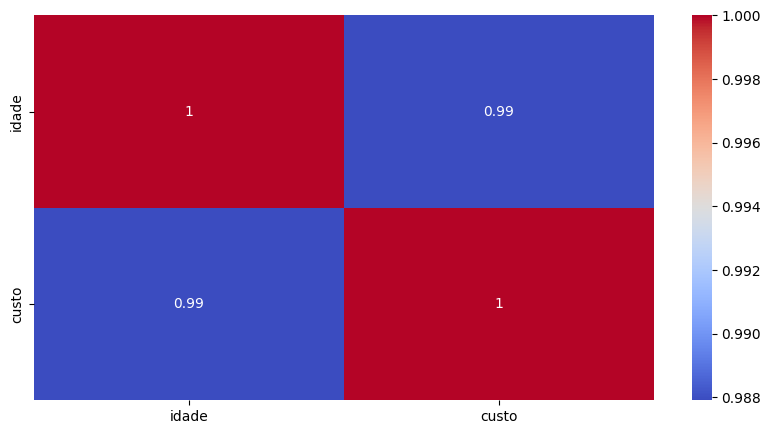

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(base_plano.corr(), annot=True, cmap="coolwarm")

In [17]:
x = x.values.reshape(-1,1)
x.shape

(11, 1)

In [18]:
from sklearn.linear_model import LinearRegression
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(x,y)

LinearRegression()

In [19]:
regressor_plano_saude.intercept_

149.05772962483752

In [20]:
regressor_plano_saude.coef_

array([46.45003234])

In [21]:
previsoes = regressor_plano_saude.predict(x)
previsoes

array([ 985.15831177, 1217.40847348, 1310.30853816, 1681.9087969 ,
       1728.35882924, 2146.40912031, 2378.65928202, 2518.00937904,
       2843.15960543, 3075.40976714, 3261.20989651])

In [23]:
grafico = px.scatter(x = x.ravel(), y = y)
grafico.add_scatter(x = x.ravel(), y = previsoes, name= 'Regressão') 
#ravel converte para numpy array
grafico.show()